#### Import libraries

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

import os
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

#### Load dataset

In [ ]:
folder_path = os.getcwd()+"\ml-100k"

file_path = [os.path.join(folder_path, folder_name) for folder_name \
             in os.listdir(folder_path) if folder_name in ["u.data", "u.item", "u.user"]]

data = pd.read_csv(file_path[0], sep="\t", names="user id | item id | rating | timestamp".split(" | "))
item = pd.read_csv(file_path[1], sep="|", names="movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | "), encoding='latin-1')
user = pd.read_csv(file_path[2], sep="|", names="user id | age | gender | occupation | zip code".split(" | "))

#### Descriptive analysis of dataset

In [ ]:
print(data.shape)
data.head(2)

(100000, 4)


,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
item id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
print(item.shape)
item.head(2)

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
item.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1682.0,841.500000,485.695893,1.0,421.25,841.5,1261.75,1682.0
video release date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unknown,1682.0,0.001189,0.034473,0.0,0.00,0.0,0.00,1.0
Action,1682.0,0.149227,0.356418,0.0,0.00,0.0,0.00,1.0
Adventure,1682.0,0.080262,0.271779,0.0,0.00,0.0,0.00,1.0
Animation,1682.0,0.024970,0.156081,0.0,0.00,0.0,0.00,1.0
Children's,1682.0,0.072533,0.259445,0.0,0.00,0.0,0.00,1.0
Comedy,1682.0,0.300238,0.458498,0.0,0.00,0.0,1.00,1.0
Crime,1682.0,0.064804,0.246253,0.0,0.00,0.0,0.00,1.0
Documentary,1682.0,0.029727,0.169882,0.0,0.00,0.0,0.00,1.0


In [ ]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [ ]:
print(user.shape)
user.head(2)

(943, 5)


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [ ]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


#### Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames

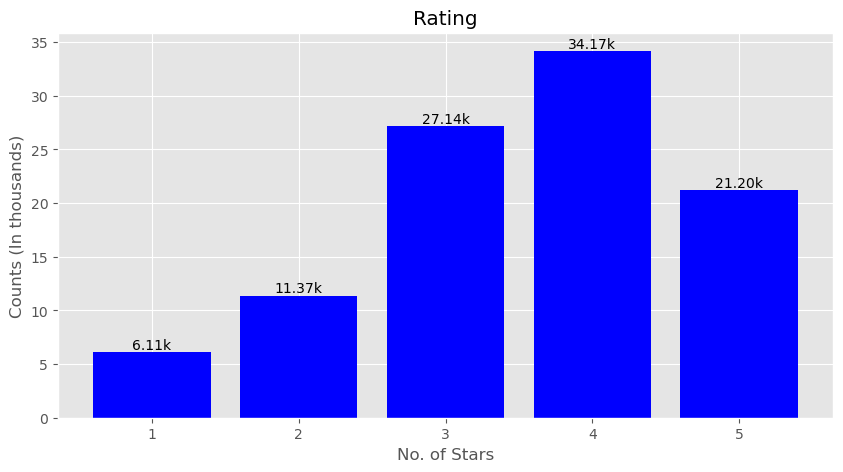

In [ ]:
# Set figure size
plt.figure(figsize=(10, 5))

# set the x and the height parameters
x = data["rating"].value_counts().index
h = [i/1000 for i in data["rating"].value_counts()]

# Plot bar chart
bars = plt.bar(x, h, color="b")

# Adding text labels at the top of each bar
for bar, height in zip(bars, h):
    plt.text(bar.get_x() + (bar.get_width() / 2), height, f'{height:.2f}k', ha='center', va='bottom')

plt.xlabel("No. of Stars")
plt.ylabel("Counts (In thousands)")
plt.title("Rating")
plt.show()

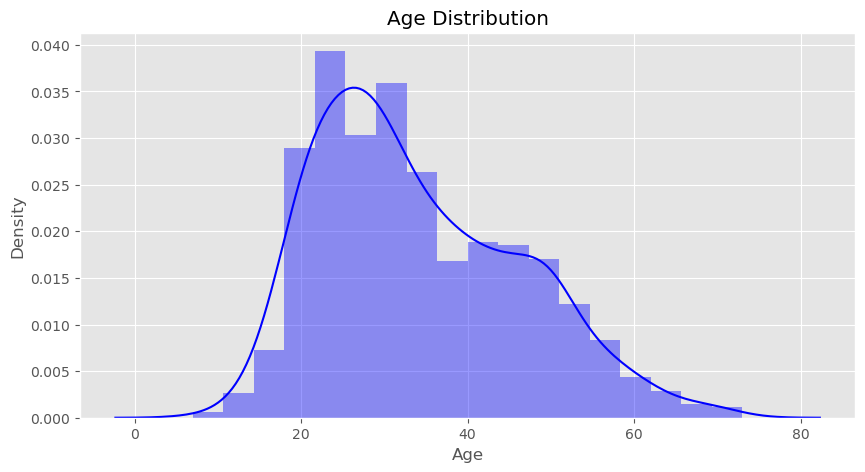

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.distplot(user["age"], color="blue")
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

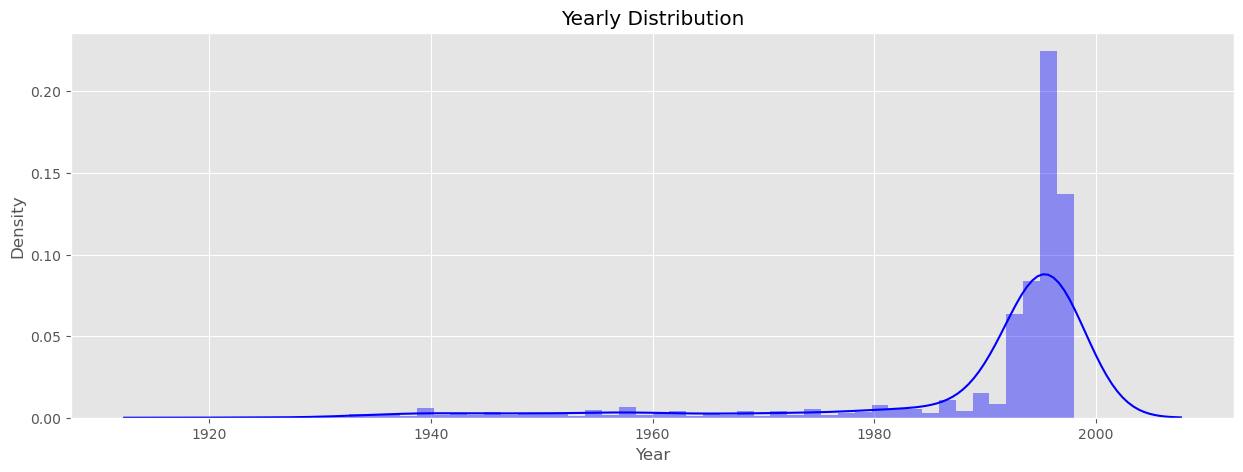

In [ ]:
# Yearly distribution
plt.figure(figsize=(15, 5))
release_year = item["release date"].apply(lambda x:str(x).split("-")[-1])
sns.distplot(release_year, color="blue")
plt.xlabel("Year")
plt.title("Yearly Distribution")
plt.show()

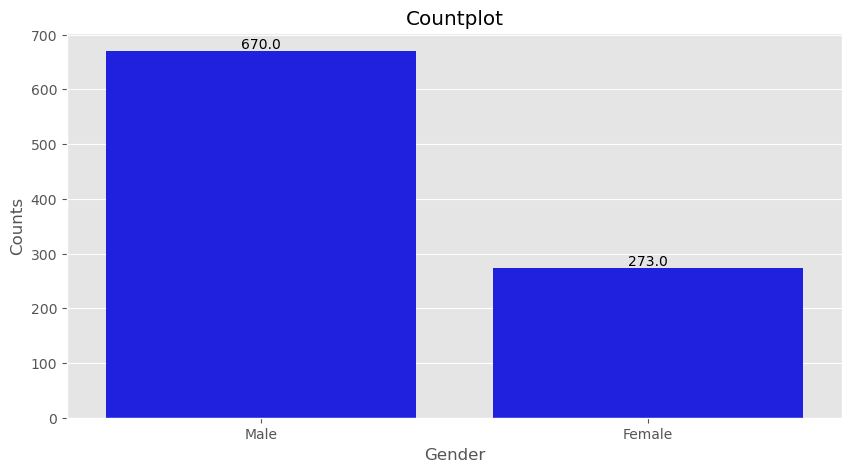

In [ ]:
plt.figure(figsize=(10, 5))
cp = sns.countplot(user, x="gender", color="blue")

# Add text to the top of the bar
for p in cp.patches:
    h = p.get_height()
    cp.text(p.get_x() + (p.get_width() / 2), h, f"{h:.1f}", ha="center", va="bottom")

# Change x-axis labels
cp.set_xticklabels(["Male", "Female"])

plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Countplot")
plt.show()

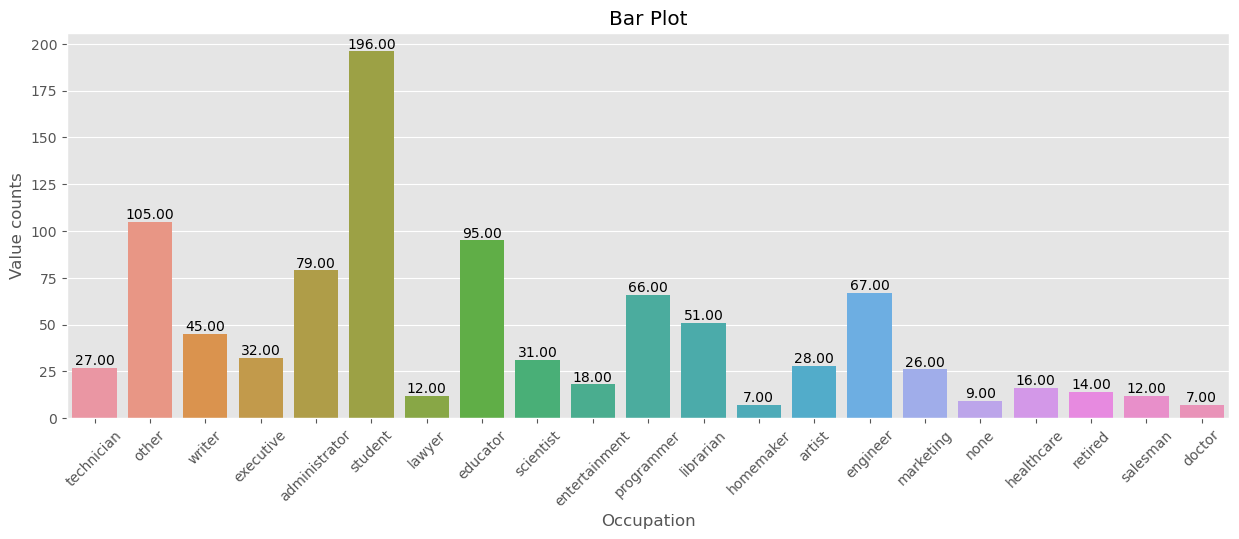

In [ ]:
plt.figure(figsize=(15, 5))

bar_plot = sns.countplot(user, x="occupation")

for p in bar_plot.patches:
    h = p.get_height()
    bar_plot.text(p.get_x() + (p.get_width()/2), h, f"{h:.2f}", va="bottom", ha="center")

plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Value counts")
plt.title("Bar Plot")
plt.show()

#### Visualize how popularity of Genres has changed over the years. From the graph  one should be able to see for any given year, movies of which genre got released the most.

In [ ]:
item_copy = item.copy()

item_copy["release year"] = release_year

In [ ]:
item_copy.drop(["movie id", "movie title", "video release date", "release date", "IMDb URL", "unknown"], axis="columns", inplace=True)

item_copy.drop(item_copy[item_copy["release year"] == "nan"].index, axis="index", inplace=True)

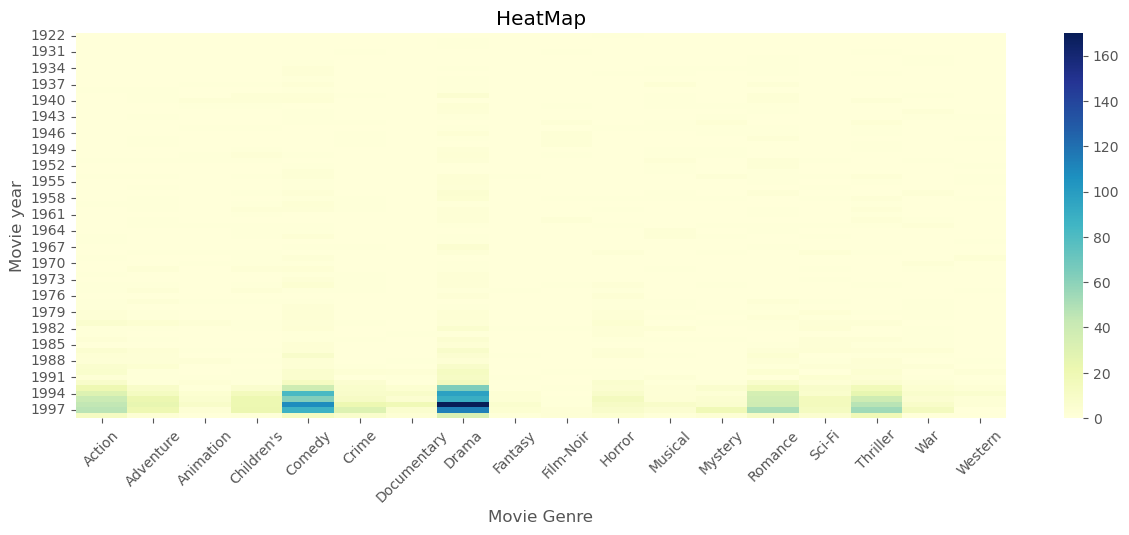

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(item_copy.groupby("release year").sum(), cmap="YlGnBu")
plt.xticks(rotation=45)
plt.xlabel("Movie Genre")
plt.ylabel("Movie year")
plt.title("HeatMap")
plt.show()

#### Display the top 25 movies by average rating, as a list/series/dataframe. Note:- Consider only the movies which received atleast a 100 ratings

In [ ]:
items = data.groupby("item id").count()["rating"]
itemsgreaterthan100 = items[items.values > 100]
rating_lst = data[data["item id"].isin(itemsgreaterthan100.index)].groupby("item id").mean().sort_values(by="rating", ascending=False)
rating_lst.head()

,user id,rating,timestamp
item id,,,
408,443.142857,4.491071,8.823304e+08
318,469.714765,4.466443,8.834050e+08
169,454.483051,4.466102,8.828888e+08
483,471.831276,4.456790,8.834745e+08
64,441.187279,4.445230,8.826119e+08


In [ ]:
top_movies = item.set_index("movie id").loc[rating_lst.index][["movie title", "release date"]]

top_movies["rating"] = rating_lst["rating"]

In [ ]:
# Top 25 movies
top_movies[:25]

,movie title,release date,rating
item id,,,
408,"Close Shave, A (1995)",28-Apr-1996,4.491071
318,Schindler's List (1993),01-Jan-1993,4.466443
169,"Wrong Trousers, The (1993)",01-Jan-1993,4.466102
483,Casablanca (1942),01-Jan-1942,4.456790
64,"Shawshank Redemption, The (1994)",01-Jan-1994,4.445230
603,Rear Window (1954),01-Jan-1954,4.387560
12,"Usual Suspects, The (1995)",14-Aug-1995,4.385768
50,Star Wars (1977),01-Jan-1977,4.358491
178,12 Angry Men (1957),01-Jan-1957,4.344000


#### Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
#####   o Men watch more drama than women
#####   o Men watch more Romance than women
#####   o Women watch more Sci-Fi than men

In [ ]:
combined_data = data.set_index("user id").join(user.set_index("user id")).set_index("item id").join(item.set_index("movie id"))

combined_data.head()

,rating,timestamp,age,gender,occupation,zip code,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,874965758,24,M,technician,85711,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,888550871,53,F,other,94043,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,875635748,33,F,other,15213,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,883599478,42,M,executive,98101,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,877888877,53,M,lawyer,90703,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


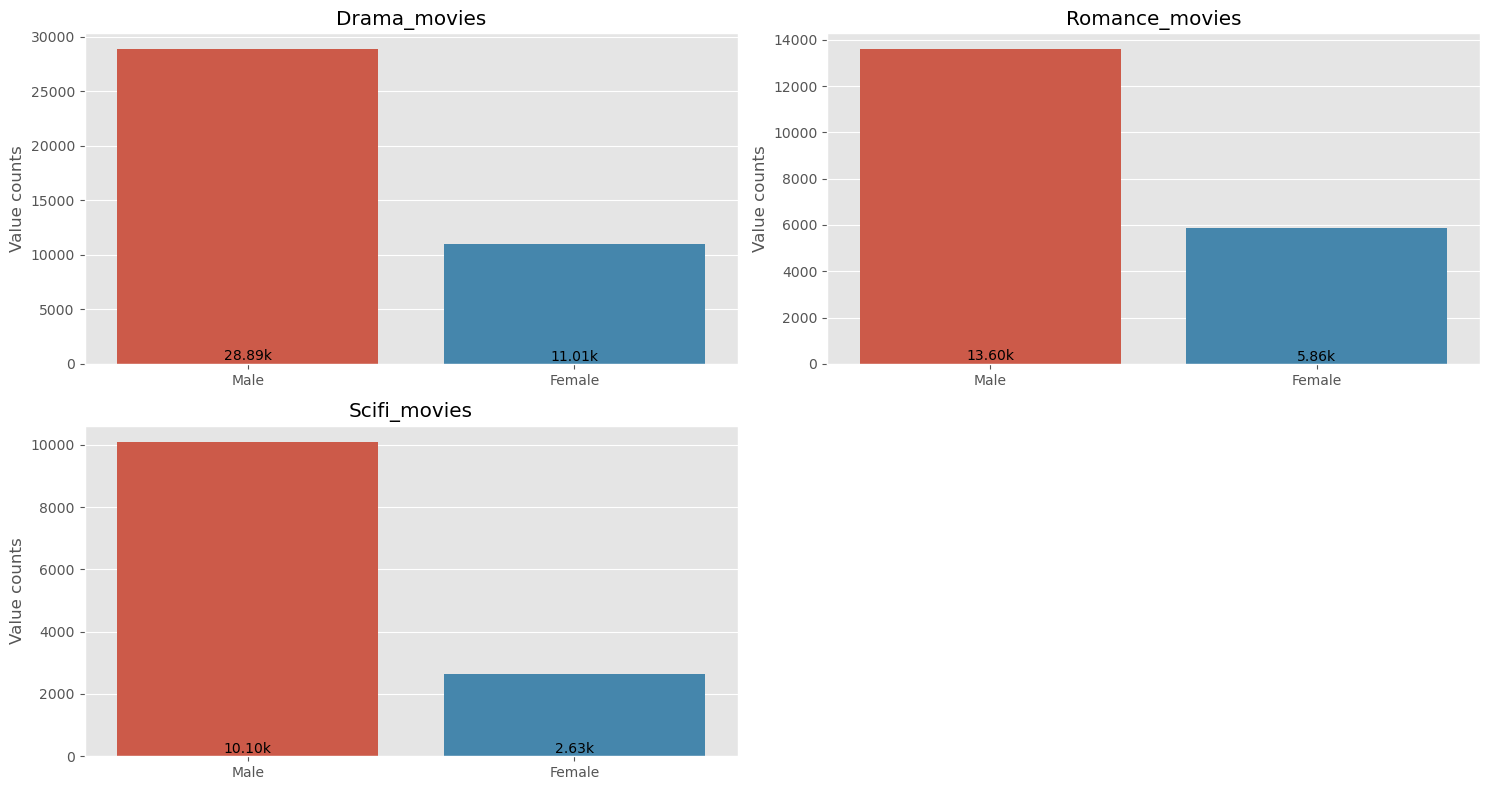

In [ ]:
action_movies = combined_data[combined_data["Drama"] == 1][["gender", "Drama"]]
romance_movies = combined_data[combined_data["Romance"] == 1][["gender", "Romance"]]
scifi_movies = combined_data[combined_data["Sci-Fi"] == 1][["gender", "Sci-Fi"]]

movie_list = [action_movies, romance_movies, scifi_movies]
movie_names = ["Drama_movies", "Romance_movies", "Scifi_movies"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    try:
        count_plot = sns.countplot(movie_list[idx], x="gender", ax=ax)
        count_plot.set_title(movie_names[idx])
        for bars in count_plot.patches:
            height = bars.get_height()/1000
            count_plot.text(bars.get_x() + (bars.get_width()/2), height, f"{height:.2f}k", va="bottom", ha="center")
        count_plot.set_xticklabels(["Male", "Female"])
        count_plot.set_xlabel("")
        count_plot.set_ylabel("Value counts")
    except:
        fig.delaxes(axes[-1])

plt.tight_layout()

#### Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
#####   o Men watch more drama than women (True)
#####   o Men watch more Romance than women (True)
#####   o Women watch more Sci-Fi than men (False)